In [82]:
import pandas as pd
import numpy as np

from pycountry import countries
import missingno as msno

In [149]:
data_dir = '.\\..\\data\\'
pickle_out_file = 'cleaned_data.pkl'
world_bank_file_input = "world_bank_data"
wb_data = pd.read_pickle(data_dir + world_bank_file_input)

In [150]:
#Create list of valid countries taken from the pycountry library
#This gives us a list of 249 countries that we will focus on
countries_list = []
for country in countries:
    countries_list.append(country.name)

In [151]:
target_year = 2010
target = 'SI.POV.DDAY'

*Let's have a look at regions that are used in the world bank data that are not in the pycountry list:*

In [152]:
exclude_list = [wb_country for wb_country in wb_data.index.levels[0].values if wb_country not in countries_list]
print(exclude_list)

['Arab World', 'Bahamas, The', 'Bolivia', 'British Virgin Islands', 'Caribbean small states', 'Central Europe and the Baltics', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao', 'Czech Republic', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Egypt, Arab Rep.', 'Eswatini', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', 'Gambia, The', 'Heavily indebted poor countries (HIPC)', 'High income', 'Hong Kong SAR, China', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Iran, Islamic Rep.', 'Korea, Dem. People’s Rep.', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic', 'Lao PDR', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Latin Americ

*Clearly, some of the regions in the list above seem to be countries of interest so we will investigate these further now to see why that are not in the pycountry list*

To investigate:  
Bahamas, The  
Bolivia  
British Virgin Islands  
Congo, Dem. Rep.  
Congo, Rep.  
Cote d'Ivoire  
Curacao  
Czech Republic  
Egypt, Arab Rep.  
Eswatini  
Gambia, The  
Hong Kong SAR, China  
Iran, Islamic Rep.  
Korea, Dem. People’s Rep.  
Korea, Rep.  
Kosovo  
Kyrgyz Republic  
Lao PDR  
Macao SAR, China  
Micronesia, Fed. Sts.  
Moldova  
North Macedonia  
Slovak Republic  
St. Kitts and Nevis  
St. Lucia  
St. Martin (French part)  
St. Vincent and the Grenadines  
Tanzania  
Venezuela, RB  
Vietnam  
Virgin Islands (U.S.)  
West Bank and Gaza  
Yemen, Rep.  

*After a bit of investigation all of the above seem to fall into 3 categories:*

1. Countries that have different names in both lists and the name in the World Bank dataset is clearer or simpler.
2. Countries that have different names in both lists and the name in the pycountry library is decided to be the standard for all further processing  (most of the above)
3. 'West Bank and Gaza' and 'Kosovo' are not listed in the pycountry list. I will add these to the countries_list seperately.

*1. Countries that have different names in both lists and the name in the World Bank dataset is clearer or simpler*

In [153]:
#Some of the names in the pycountry list could be simplified or made clearer.
pycountry_list_transform={
#Remove names                      #Replace with these
'Bolivia, Plurinational State of' :'Bolivia',
'Côte d\'Ivoire'                  :'Cote d\'Ivoire',
'Curaçao'                         :'Curacao',
'Czechia'                         :'Czech Republic',
'Viet Nam'                        :'Vietnam'
}

#remove the old names specifie above dictinary
countries_list = [c for c in countries_list if c not in list(pycountry_list_transform.keys()) ]

#Add the new names
countries_list.extend(list(pycountry_list_transform.values()))

*2. Countries that have different names in both lists and the name in the pycountry library is decided to be the standard for all further processing (most of the above)*

In [154]:
countries_transform = {
'Bahamas, The'                  :'Bahamas',
'British Virgin Islands'        :'Virgin Islands, British',
'Congo, Dem. Rep.'              :'Congo, The Democratic Republic of the',
'Congo, Rep.'                   :'Congo',
'Egypt, Arab Rep.'              :'Egypt',
'Eswatini'                      :'Swaziland',
'Gambia, The'                   :'Gambia',
'Hong Kong SAR, China'          :'Hong Kong',
'Iran, Islamic Rep.'            :'Iran, Islamic Republic of',
'Korea, Dem. People’s Rep.'     :'Korea, Democratic People\'s Republic of',
'Korea, Rep.'                   :'Korea, Republic of',
'Kyrgyz Republic'               :'Kyrgyzstan',
'Lao PDR'                       :'Lao People\'s Democratic Republic',
'Macao SAR, China'              :'Macao',
'Micronesia, Fed. Sts.'         :'Micronesia, Federated States of',
'Moldova'                       :'Moldova, Republic of',
'North Macedonia'               :'Macedonia, Republic of',
'Slovak Republic'               :'Slovakia',
'St. Kitts and Nevis'           :'Saint Kitts and Nevis',
'St. Lucia'                     :'Saint Lucia',
'St. Martin (French part)'      :'Saint Martin (French part)',
'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
'Tanzania'                      :'Tanzania, United Republic of',
'Venezuela, RB'                 :'Venezuela, Bolivarian Republic of',
'Virgin Islands (U.S.)'         :'Virgin Islands, U.S.',
'Yemen, Rep.'                   :'Yemen'}
    

In [155]:
#Get index as a list, make changes and reapply the list to the World Bank dataframe
index_of_wb_countries = list(wb_data.index.levels[0])

for remove_region, replace_with_region in countries_transform.items():
    index_of_wb_countries[index_of_wb_countries.index(remove_region)] = replace_with_region

#reapply the index to the original dataframe
wb_data.index = wb_data.index.set_levels(index_of_wb_countries, level=0)

*3. 'West Bank and Gaza' and 'Kosovo' are not listed in the pycountry list. I will add these to the countries_list seperately.*

In [156]:
add_list = ['West Bank and Gaza', 'Kosovo']

countries_list.extend(add_list)

*Have another look at what regions are going to be excluded:*

In [157]:
new_exclude_list = [wb_country for wb_country in wb_data.index.levels[0].values if wb_country not in countries_list]
print(new_exclude_list)

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'Channel Islands', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Euro area', 'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD countries)', 'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD countries)', 'Middle East & North Africa (excluding high income)', 'Middle income', 'North

*Now that we have built up our countries_list and refactored the World Bank dataframes country index, it is time to apply the filter to the World bank dataframe.*

In [158]:
include_list = countries_list
wb_data_countries_only = wb_data.loc[include_list]

In [159]:
#A little bit of dataframe butchery here!!
#For some reason after the dataframe subset creation above, the index of the new..
#dataframe was the same as the original. Below is a way of getting around this..
#(i.e. by generating a new one using reset_index/set_index)
temp_data = wb_data_countries_only.reset_index()
filtered_data = temp_data.set_index(['country', 'year'])

*Summary of Missing Data:*

In [161]:
#According to pandas docs on multiIndex usage: For objects to be indexed and sliced effectively, they need to be sorted.
filtered_data = filtered_data.sort_index()

### Investigate Missing data

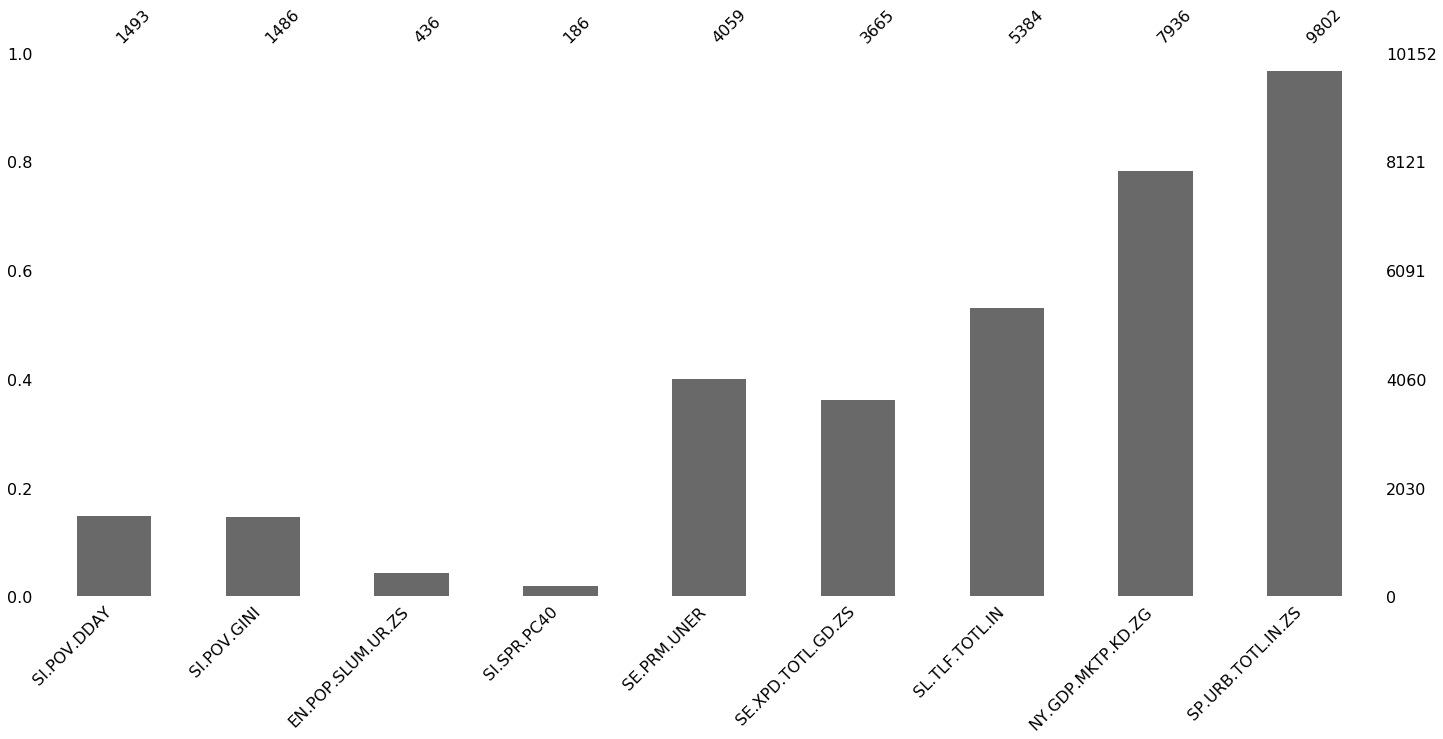

In [130]:
msno.bar(filtered_data)

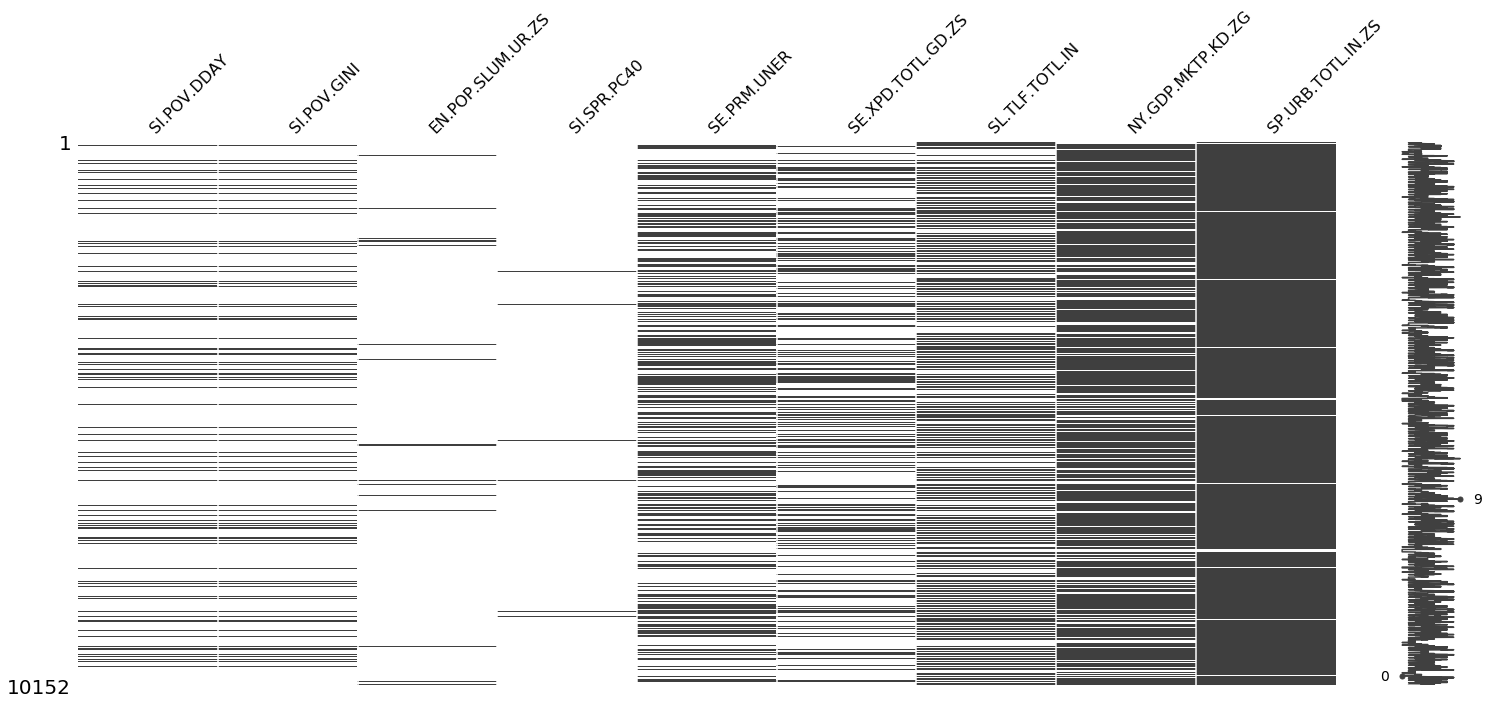

In [131]:
msno.matrix(filtered_data)

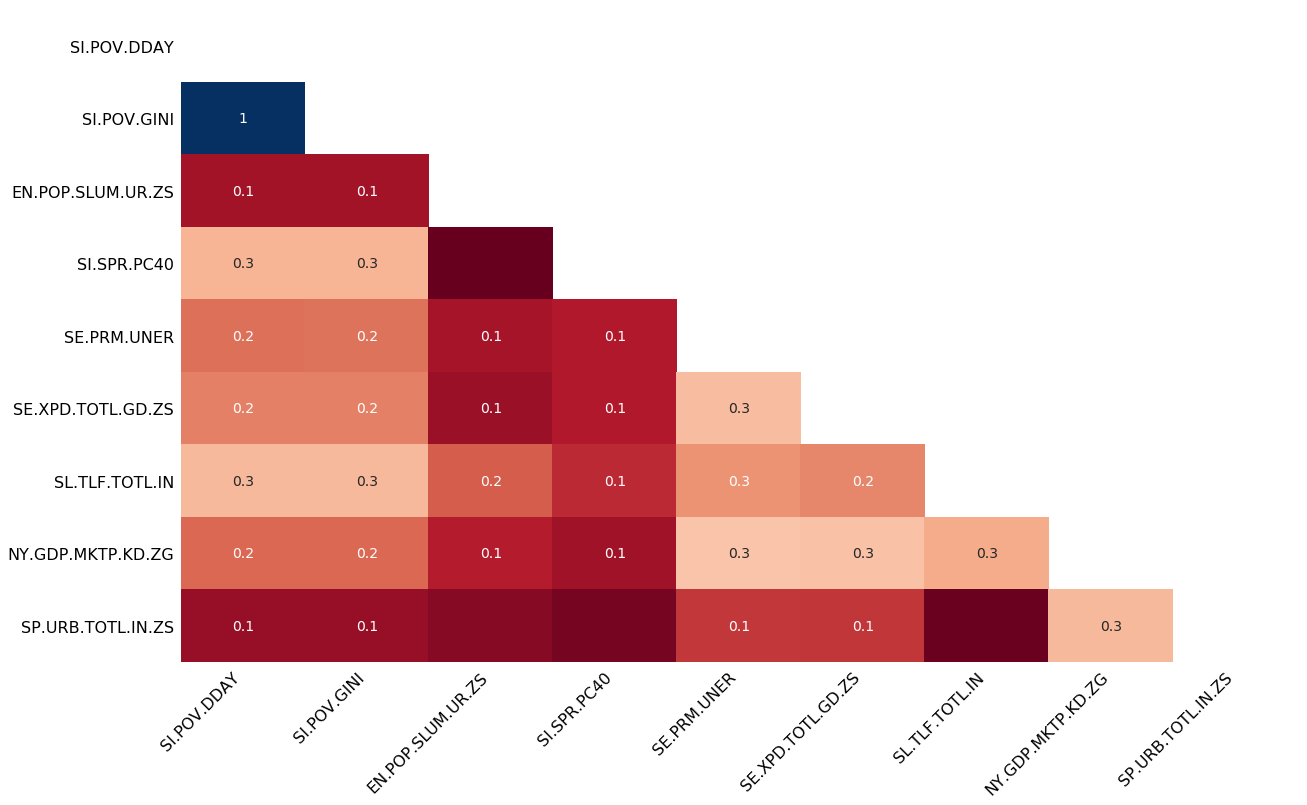

In [21]:
msno.heatmap(filtered_data)

#### Invesigate the target variable SI.POV.DDAY

In [132]:
target_table = filtered_data['SI.POV.DDAY'].unstack(level='country')

Here is a plot of the distribution of missing values. Time (from 1972 to 2015) runs from top to bottom. From left to right are all the countries in the dataset.

White represents missing data. It's pretty clear that we have a lot of our missing data for our target. This will affect the data that we can use for training (target needed for each training observation) and for test data (to measure error)

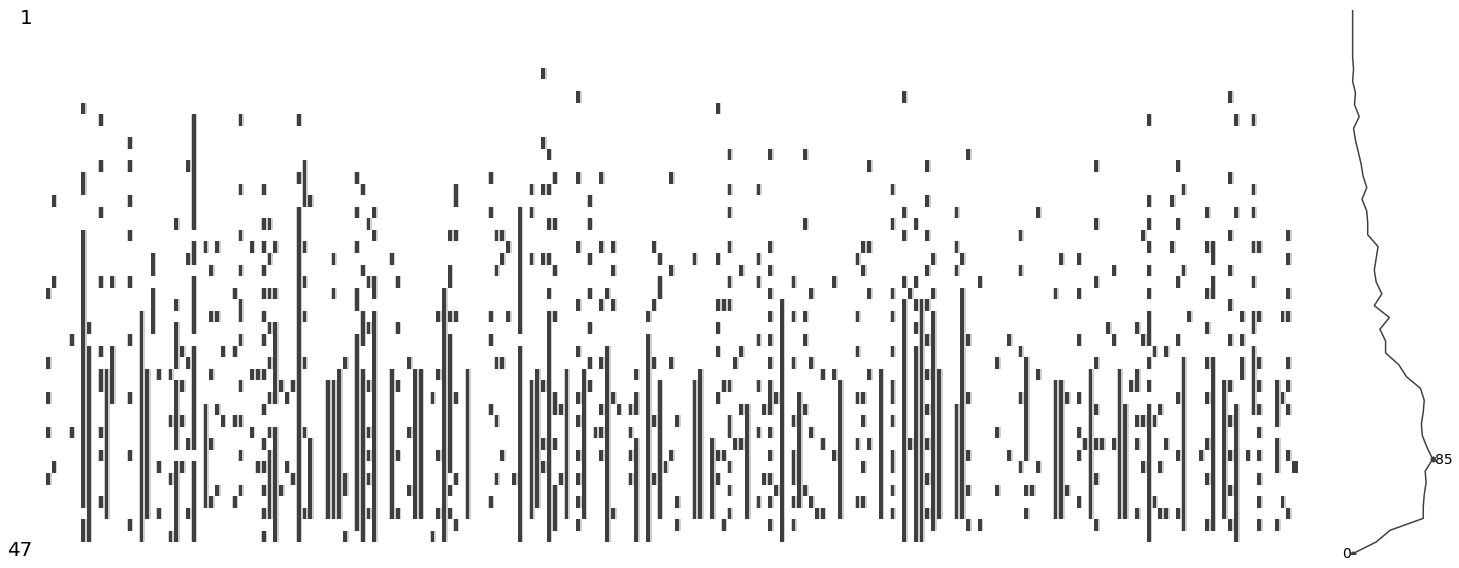

In [133]:
msno.matrix(target_table)

### Remove countries without required target data

For this study, we attempt to predict the target for all countries except:

1. Those that do not have a target variable present for the target year, 2010. We drop these as we are unable to evaluate predicted value against actual value without them  
2. Those that do not have any record of SI.POV.DDAY before the target year (i.e. 2010 is the first year that the SI.POV.DDAY indicator was recorded for the country).   
*(Are we missing a trick here? Could these be considered the acid test for our forecaster or do they represent a separate category of problem whereby a separate model would be tuned to optimise for new cases without past values of the target?)* 
 

In [162]:
#For every country in the filtered_data
for country in filtered_data.index.levels[0]:
    if np.isnan(filtered_data.loc[(country,str(target_year)), target]):
        filtered_data.drop(country,level=0, inplace=True)

#Remove from the index as well        
filtered_data.index = filtered_data.index.remove_unused_levels()        

In [186]:
print("After removing countries that have no target variable for the target year we are left with", \
      len(filtered_data.index.levels[0]), "countries")

After removing countries that have no target variable for the target year we are left with 83 countries


Now remove those that do not have any record of SI.POV.DDAY before the target year. 

In [177]:
country = 'Spain'
np.all((np.isnan(filtered_data.loc[(country):(country,str(target_year-1)), target])))

False

In [181]:
for country in filtered_data.index.levels[0]:
    if np.all(np.isnan(filtered_data.loc[(country):(country,str(target_year-1)), target])):
        print(country)
        filtered_data.drop(country,level=0, inplace=True)

#Remove from the index as well
filtered_data.index = filtered_data.index.remove_unused_levels() 

Tuvalu
Vanuatu


In [188]:
print("After removing countries that have no historical data for the target we are left with", \
      len(filtered_data.index.levels[0]), "countries")

After removing countries that have no historical data for the target we are left with 83 countries


### Write Files to disk

In [189]:
#Write the original dataset filtered to include only countries
filtered_data.to_pickle(data_dir + pickle_out_file)